<a href="https://colab.research.google.com/github/wbandabarragan/EPIC_4/blob/main/Day_3/Tutorial5_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Physics without frontiers: ECUADOR**
### School of Programming for Scientific Research: EPIC 4
#### *A Deep Dive Into Data Analysis and Machine Learning for Physical and Life Sciences*

![image.png](attachment:image.png)

## **Tutorial 5:** Building Generative AI Applications
##### **Tutor:** Manuel Eugenio Morocho Cayamcela, PhD
##### More about the tutor [ here](http://www.eugeniomorocho.com).

Complementary slides for this Tutorial [here](https://www.canva.com/design/DAGLzY4bFA0/TRvXH8W4NP5JeALVioDrBg/view?utm_content=DAGLzY4bFA0&utm_campaign=designshare&utm_medium=link&utm_source=editor).

## **5.1 Using traditional data science**

En este caso práctico, se presenta el concepto de agrupamiento (clustering) utilizando un ejemplo relacionado con la base de datos `mall_customers.csv`, que presenta datos de clientes de un centro comercial y una variable que representa su comportamiento de compra.

![image.png](attachment:image.png)

El conjunto de datos `mall_customers.csv` tiene las siguientes variables:

1. `CustomerID`: Un identificador único para cada cliente. Es un número entero que se incrementa en 1 para cada cliente.

2. `Gender`: El género del cliente. Es una variable categórica con dos posibles valores: 'Male' y 'Female'.

3. `Age`: La edad del cliente. Es una variable numérica.

4. `Annual Income (k$)`: El ingreso anual del cliente, en miles de dólares. Es una variable numérica.

5. `Spending Score (1-100)`: La puntuación de gasto del cliente, en una escala de 1 a 100. Es una variable numérica. Esta puntuación es un indicador de cuánto gasta el cliente o de su comportamiento de compra.

El "spending score" es una medida que representa cuánto dinero gasta un cliente en un establecimiento en particular en un período de tiempo determinado. Esta métrica es crucial para comprender el comportamiento de compra de los clientes y segmentarlos en grupos que comparten características similares. Pero, ¿cómo se calcula este puntaje y de dónde se obtiene en una empresa real?

El "spending score" se deriva de una combinación de diferentes factores, como la frecuencia de las visitas al establecimiento, el valor promedio de la compra, la cantidad total gastada en un período de tiempo específico, entre otros. A menudo, las empresas utilizan sistemas de seguimiento de clientes, como programas de lealtad, tarjetas de fidelidad o sistemas de punto de venta (POS), para recopilar datos sobre las compras de los clientes. Estos sistemas registran cada transacción realizada por un cliente, incluido el monto gastado, los artículos comprados y la frecuencia de las visitas.

Con esta información, las empresas pueden calcular el "spending score" utilizando diversos métodos, como asignar puntos a cada compra en función del valor o la frecuencia, o utilizando algoritmos más complejos que tienen en cuenta múltiples variables. El objetivo es crear una métrica que refleje de manera precisa y significativa el comportamiento de compra de cada cliente.

En el mundo real, el "spending score" se utiliza en una variedad de industrias, incluyendo minoristas, restaurantes, hoteles, servicios financieros y más. Las empresas lo utilizan para comprender mejor a sus clientes, identificar patrones de compra, diseñar estrategias de marketing dirigidas y mejorar la experiencia del cliente.

### **Contenido:**

#### Importamos los paquetes necesarios

In [ ]:
# Instalamos los paquetes necesarios
!pip install scikit-learn
!pip install pandas
!pip install matplotlib
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 607.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 718.2 kB/s eta 0:00:00 0:00:01
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 1.3 MB/s eta 0:00:0000:0100:01m
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.2/21.2 MB 1.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.1/39.1 MB 1.3 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Using cached pandas-2.2.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata (19 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.2-cp311-cp311-macosx_10_9_x86_64.whl (12.6 MB)
Using cached pytz-2024.1-py2.p

In [ ]:
# Importamos los paquetes necesarios
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

#### Cargamos la base de datos

In [ ]:
# Cargamos la base de datos 'mall_customers.csv'
clientes = pd.read_csv('/Users/eugenio/Library/CloudStorage/OneDrive-Personal/UIDE/EPIC_4/Day_3/mall_customers.csv')

#### Visualizamos las primeras 10 filas de la base de datos cargada

In [ ]:
# Visualizamos los primeros registros
clientes.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


#### Eliminamos columnas que no aportan información útil para el análisis

La columna `CustomerID` es un identificador único para cada cliente. En la mayoría de los casos, este tipo de identificadores no aporta información útil para el análisis de los datos o para la construcción de modelos de data mining, ya que no tiene relación con las otras variables. Por lo tanto, es común eliminar esta columna antes de realizar el análisis.



El método `drop` de pandas elimina la columna especificada (`'CustomerID'`) del DataFrame. El argumento `axis=1` indica que queremos eliminar una columna (en lugar de una fila). El DataFrame resultante se guarda de nuevo en la variable `clientes`.

In [ ]:
# Eliminamos la columna 'CustomerID'
clientes = clientes.drop('CustomerID', axis=1)
clientes.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


#### Análisis exploratorio de datos

In [ ]:
# Visualizamos la información de la base de datos
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
# Visualizamos la descripción de la base de datos
clientes.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


#### Codificamos la columna categórica 'Gender'

Utilizamos el método `replace` de pandas para reemplazar los valores en la columna 'Gender' del DataFrame 'clientes'.

- `clientes['Gender']`: Selecciona la columna 'Gender' del DataFrame 'clientes'.

- `replace({'Female': 0, 'Male': 1})`: Este método reemplaza los valores en la columna según el mapeo proporcionado. En este caso, está reemplazando 'Female' con 0 y 'Male' con 1. Esto se conoce como codificación de etiquetas o "label encoding".

El propósito de este código es convertir la variable categórica 'Gender' en una variable numérica, lo que nos será útil para calcular la correlación de variables.

In [ ]:
# Codificamos la variable 'Gender'
clientes['Gender'] = clientes['Gender'].replace({'Female': 0, 'Male': 1})
clientes.head(10)

/var/folders/8j/f0xtldm91_1c2bpdr69fxgzw0000gn/T/ipykernel_3597/1306256639.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clientes['Gender'] = clientes['Gender'].replace({'Female': 0, 'Male': 1})


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
5,0,22,17,76
6,0,35,18,6
7,0,23,18,94
8,1,64,19,3
9,0,30,19,72


#### Usamos `ydata_profiling` para perfilar los datos

La herramienta `ydata_profiling` es muy poderosa para el análisis exploratorio de datos. Esta biblioteca de Python genera perfiles de datos detallados a partir de un DataFrame de pandas, proporcionando una visión rápida y completa de la estructura, relaciones y distribuciones de los datos.

Con `ydata_profiling`, puedes obtener un informe completo de tu conjunto de datos con solo unas pocas líneas de código. El informe incluye estadísticas descriptivas, distribuciones de variables, correlaciones, valores faltantes, entre otros aspectos. Esto puede ser extremadamente útil al inicio de cualquier proyecto de análisis de datos o data mining, ya que te permite entender tus datos antes de proceder con el preprocesamiento o modelado.

Ten en cuenta que `ydata_profiling` es una herramienta de análisis de datos y, como tal, no reemplaza la necesidad de un análisis cuidadoso y una comprensión profunda de tus datos. Siempre es importante verificar y entender los resultados que proporciona.

In [ ]:
# Instalamos la librería ydata_profiling
!pip install ydata_profiling

# Importamos ProfileReport de la librería ydata_profiling
from ydata_profiling import ProfileReport

  Using cached scipy-1.13.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata (60 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 1.2 MB/s eta 0:00:0000:0100:01
  Using cached PyYAML-6.0.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata (2.1 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached visions-0.7.6-py3-none-any.whl.metadata (11 kB)
  Using cached numpy-1.26.4-cp311-cp311-macosx_10_9_x86_64.whl.metadata (61 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached phik-0.12.4-cp311-cp311-macosx_10_13_x86_64.whl.metadata (5.6 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
  Using cached statsmodels-0.14.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata (9.2 kB)
  Using cached typeguard-4.3.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached wordcloud-1.9.3-cp311-cp311-macosx_10_9_x86_64.wh

/Users/eugenio/Library/CloudStorage/OneDrive-Personal/UIDE/EPIC_4/.conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


- `clientes`: Es el DataFrame de pandas que vamos a perfilar.

- `title='Reporte de Perfilado de Datos de Clientes'`: Este argumento establece el título del informe.

- `explorative=True`: Este argumento indica que el informe debe ser exploratorio. Esto significa que el informe incluirá más información y análisis que un informe de perfilado estándar.

El informe de perfilado de datos proporciona una visión general rápida de tu conjunto de datos, incluyendo el tipo de datos, los valores únicos, los valores faltantes, las estadísticas descriptivas, las correlaciones y la distribución de las variables.

Para visualizar el informe, simplemente necesitas llamar al objeto `perfil_datos` en una celda de Jupyter Notebook.

In [ ]:
# Generamos el reporte de perfilado de datos
perfil_datos = ProfileReport(clientes, title='Reporte de Perfilado de Datos de Clientes', explorative=True)

python(4160) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [ ]:
# Visualizamos el reporte de perfilado de datos y lo guardamos en un archivo HTML
#!pip install ipywidgets
#perfil_datos.to_widgets()
perfil_datos.to_file('reporte_perfilado_datos_clientes.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 160.23it/s]


#### Graficamos la distribución de las variables

La distribución de las variables en un conjunto de datos puede proporcionar información valiosa sobre las características de los datos. Aquí hay algunas cosas que podrías observar:

**Tendencia central**: La media y la mediana pueden dar una idea de dónde se centran los datos.

**Dispersión**: La desviación estándar y el rango intercuartil pueden indicar cuánto se dispersan los datos alrededor de la media.

**Asimetría**: Si los datos están sesgados a la izquierda o a la derecha, puede indicar que hay valores atípicos o que los datos no se distribuyen de manera uniforme.

**Valores atípicos**: Los valores que están significativamente alejados del resto de los datos pueden indicar errores de medición, o pueden representar variaciones naturales en los datos.

**Distribución multimodal**: Si los datos tienen más de un pico, puede indicar que hay subgrupos dentro de los datos.

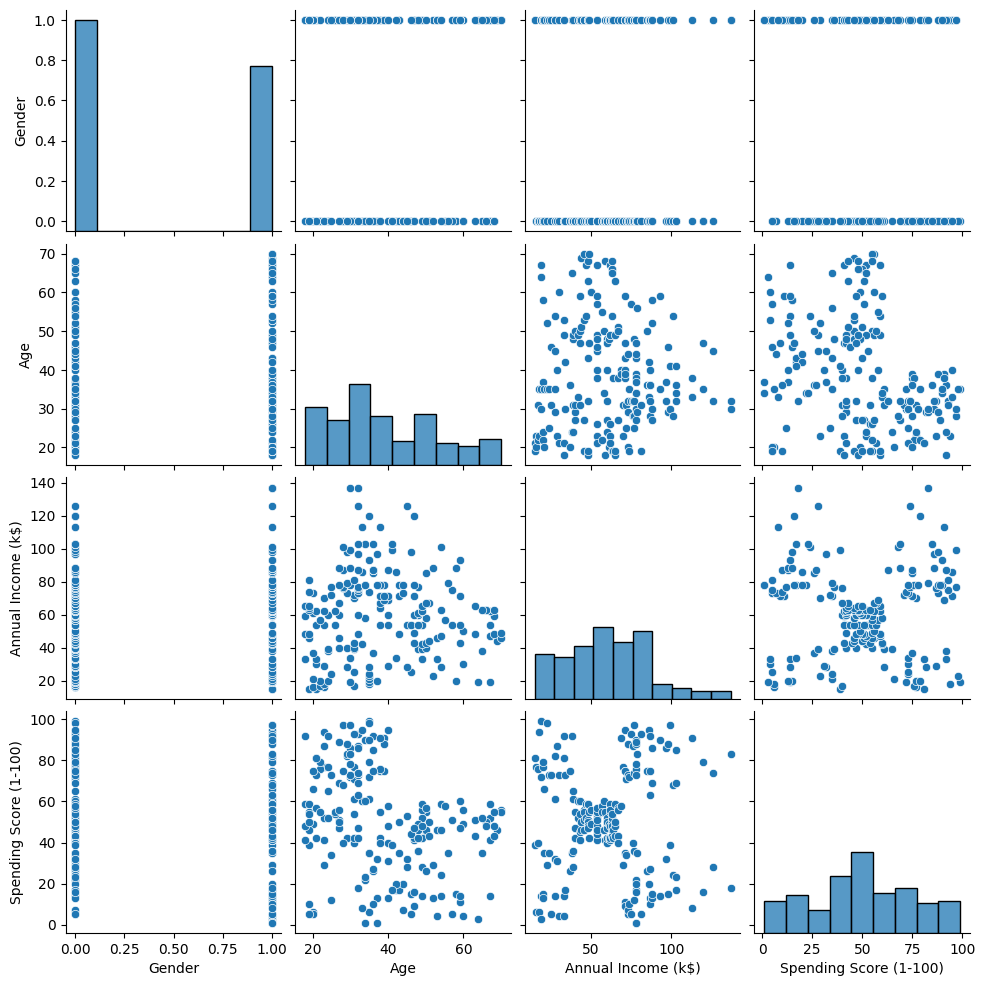

In [ ]:
# Graficamos la distribución de todas las variables
sns.pairplot(clientes)

#### Creamos un nuevo DataFrame aislando las variables 'Annual Income (k$)' y 'Spending Score (1-100)'

El gráfico de dispersión entre 'Annual Income (k$)' y 'Spending Score (1-100)' revela agrupaciones visibles de datos, lo que sugiere que hay grupos de clientes con comportamientos de gasto similares en relación con sus ingresos anuales.

Creamos un nuevo DataFrame que contenga solo estas dos variables para analizar más a fondo estas agrupaciones y aplicar técnicas de clustering para identificar y definir estos grupos de manera más formal.

Esto puede proporcionar información valiosa para la estrategia de marketing, ya que permite segmentar a los clientes en función de su comportamiento de gasto en relación con sus ingresos, lo que a su vez puede informar decisiones sobre la orientación de las ofertas y promociones, la personalización de la comunicación con los clientes, y más.

In [ ]:
# Creamos un DataFrame solamente con las columnas 'Age' y 'Annual Income(k$)'
income_spending = clientes[['Annual Income (k$)', 'Spending Score (1-100)']]
income_spending.head(10)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


#### Graficamos la distribución de las variables 'Age' y 'Annual Income (k$)'

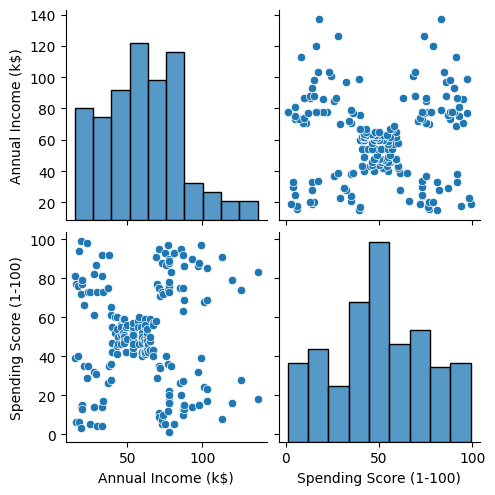

In [ ]:
# Graficamos la distribución de income_spending
sns.pairplot(income_spending)

#### Agrupamos el DataFrame 'income_spending' usando el algoritmo KMeans

Usamos un agrupamiento `KMeans` en el DataFrame `income_spending` para encontrar 2 clusters utilizando el algoritmo KMeans, y luego añadimos las etiquetas de los clusters a los datos.

- `modelo_kmeans = KMeans(n_clusters=2)`: Esta línea crea una instancia del modelo KMeans con 2 clusters. El número de clusters es un parámetro que se debe especificar.

- `modelo_kmeans.fit(income_spending)`: Esta línea ajusta el modelo a los datos de `income_spending`. El modelo KMeans intentará encontrar los centros de los clusters que minimizan la varianza dentro de cada cluster.

- `income_spending['Cluster'] = modelo_kmeans.labels_`: Después de ajustar el modelo, puedes obtener las etiquetas de los clusters para cada punto de datos utilizando el atributo `labels_` del modelo. Esta línea añade las etiquetas de los clusters como una nueva columna en el DataFrame `income_spending`.

- `income_spending.head(10)`: Esta línea muestra las primeras 10 filas del DataFrame `income_spending`, que ahora incluye la columna 'Cluster'.

In [ ]:
# Instanciamos el modelo KMeans
modelo_kmeans = KMeans(n_clusters=2)

# Ajustamos el modelo a los datos
modelo_kmeans.fit(income_spending)

# Duplicamos la base de datos 'income_spending' para no modificar la original y agregar los clusters
income_spending_cluster = income_spending.copy()

# Obtenemos las etiquetas de los clusters asignados a cada cliente
income_spending_cluster['Cluster'] = modelo_kmeans.labels_

# Visualizamos los primeros registros de 'income_spending_cluster'
income_spending_cluster.head(10)

python(4375) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,1
1,15,81,1
2,16,6,1
3,16,77,1
4,17,40,1
5,17,76,1
6,18,6,1
7,18,94,0
8,19,3,1
9,19,72,1


Creamos un gráfico de pares de las variables de `income_spending`, coloreando los puntos de acuerdo con los clusters identificados por el algoritmo KMeans. Esto nos ayuda a visualizar cómo se distribuyen los clusters en el espacio de las variables.

- `sns.pairplot(income_spending)`: Esta función crea un gráfico de pares de todas las variables en el DataFrame `income_spending`. Un gráfico de pares muestra la relación entre cada par de variables en un conjunto de datos.

- `hue='Cluster'`: Este argumento indica que los puntos en el gráfico deben ser coloreados de acuerdo con la columna 'Cluster'. Esto permite visualizar cómo se distribuyen los clusters en cada par de variables.

- `palette='viridis'`: Este argumento establece la paleta de colores a usar para los diferentes clusters. 'viridis' es una paleta de colores perceptualmente uniforme que es fácil de interpretar.

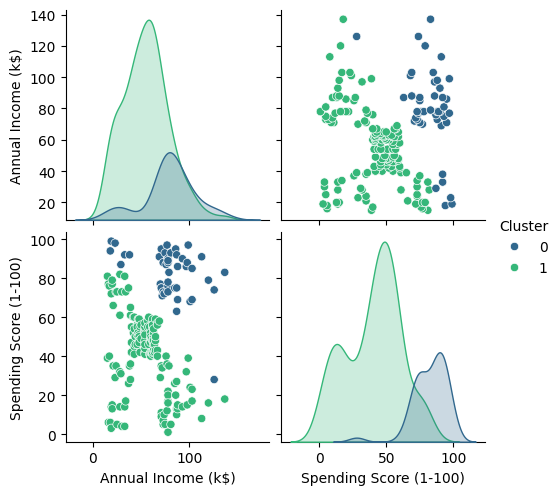

In [ ]:
# Visualizamos los clusters generados por el modelo KMeans
sns.pairplot(income_spending_cluster, hue='Cluster', palette='viridis')

Vemos que posiblemente 2 no sea el valor óptimo de $k$ que buscamos. Intentemos encontrar el mejor valor de $k$ utilizando el método del codo. Este método implica ejecutar el algoritmo de agrupamiento KMeans para un rango de valores de $k$ y luego trazar el número de clusters contra la suma de las distancias al cuadrado dentro de cada cluster. El "codo" en esta trama, es decir, el punto de inflexión donde la tasa de disminución se vuelve significativamente menor, puede indicar un buen valor de $k$.

#### Evaluamos el mejor valor de $k$ con el método del codo

El método del codo se usa para determinar el número óptimo de grupos (clusters) para el algoritmo KMeans.

1. `ks = range(1, 10)`: Aquí se define un rango de números del 1 al 9. Estos representan los posibles números de clusters que se probarán en el algoritmo KMeans.

2. `inercias = []`: Se crea una lista vacía llamada `inercias` para almacenar los valores de inercia para cada número de clusters.

3. Luego, se realiza un bucle sobre cada número en el rango `ks`:

   - `model = KMeans(n_clusters=k)`: Se crea una instancia del algoritmo KMeans con `k` clusters. El parámetro `random_state` es utilizado para controlar la aleatoriedad en la inicialización del algoritmo y es útil para asegurar que los resultados sean reproducibles.
   
   - `model.fit(samples)`: Se ajusta el modelo a los datos contenidos en `samples`.
   
   - `inercias.append(model.inertia_)`: Se añade el valor de la inercia del modelo a la lista `inercias`. La inercia es una medida de cuán dispersos están los clusters, y se busca minimizarla.

4. Finalmente, se grafican los valores de inercia en función del número de clusters:

   - `plt.plot(ks, inercias, marker='+', linewidth=0.5, markersize=5)`: Se crea un gráfico de línea entre `ks` e `inercias`. El argumento `marker='+'` especifica que se deben usar cruces (`+`) como marcadores en el gráfico. El argumento `linewidth=0.5` establece el ancho de la línea del gráfico a 0.5, y el argumento `markersize=5` establece el tamaño de los marcadores a 5.
   
   - `plt.xlabel('Número de clusters, k')` y `plt.ylabel('Inercia')`: Se establecen las etiquetas de los ejes x e y.
   
   - `plt.xticks(ks)`: Se establecen las marcas del eje x para que coincidan con los números de clusters.
   
   - `plt.show()`: Se muestra el gráfico.

El punto en el que la línea del gráfico se dobla (como un "codo") suele considerarse un buen indicador del número óptimo de clusters.

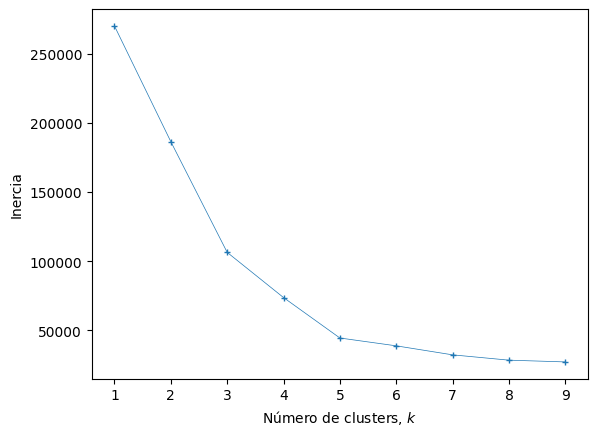

In [ ]:
# Definimos un rango de números del 1 al 9 para representar los posibles números de clusters
ks = range(1, 10)

# Creamos una lista vacía para almacenar los valores de inercia para cada número de clusters
inercias = []

# Iteramos sobre cada número en el rango ks
for k in ks:
    # Creamos una instancia del algoritmo KMeans con k clusters
    model = KMeans(n_clusters=k)

    # Ajustamos el modelo a los datos contenidos en income_spending
    model.fit(income_spending)

    # Añadimos el valor de la inercia del modelo a la lista inercias
    inercias.append(model.inertia_)

# Graficamos los valores de inercia en función del número de clusters
plt.plot(ks, inercias, marker='+', linewidth=0.5, markersize=5)

# Establecemos la etiqueta del eje x
plt.xlabel('Número de clusters, $k$')

# Establecemos la etiqueta del eje y
plt.ylabel('Inercia')

# Establecemos las marcas del eje x para que coincidan con los números de clusters
plt.xticks(ks)

# Mostramos el gráfico
plt.show()

#### Ajustamos el modelo con el nuevo valor de $k$ y visualizamos los clusters

Observamos que el punto de inflexión ocurre en $k$ = 5, entonces es razonable seleccionar 5 como el nuevo valor óptimo para $k$.

Ahora volvemos a ejecutar el algoritmo KMeans con $k$ = 5 y observamos cómo cambian los clusters. Esto nos proporciona una segmentación más precisa de los clientes basada en sus ingresos anuales y puntuaciones de gasto.

In [ ]:
# Instanciamos el modelo KMeans
modelo_kmeans = KMeans(n_clusters=5)

# Ajustamos el modelo a los datos
modelo_kmeans.fit(income_spending)

KMeans(n_clusters=5)

In [ ]:
# Obtenemos las etiquetas de los clusters asignados a cada cliente
income_spending['Cluster'] = modelo_kmeans.labels_
income_spending.head(10)

/var/folders/8j/f0xtldm91_1c2bpdr69fxgzw0000gn/T/ipykernel_3597/3986714526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_spending['Cluster'] = modelo_kmeans.labels_


,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,1
2,16,6,4
3,16,77,1
4,17,40,4
5,17,76,1
6,18,6,4
7,18,94,1
8,19,3,4
9,19,72,1


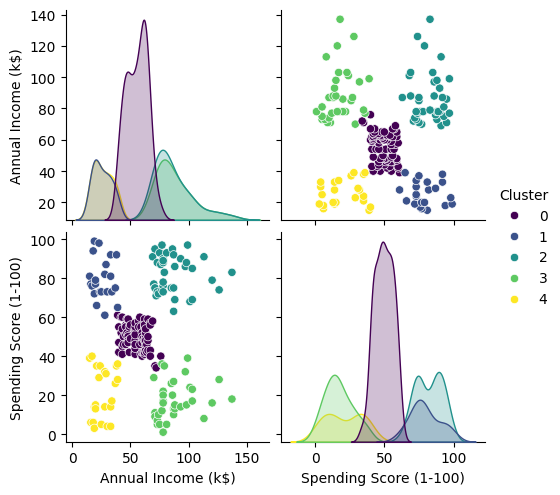

In [ ]:
# Visualizamos los clusters
sns.pairplot(income_spending, hue='Cluster', palette='viridis')

Al agrupar los clientes en 5 grupos utilizando las variables `Spending Score` y `Annual Income`, podemos obtener información valiosa para un reporte de inteligencia de negocios. Aquí hay algunas posibilidades:

1. **Segmentación de clientes**: Los grupos pueden representar diferentes segmentos de clientes. Por ejemplo, el grupo superior derecho consistuye clientes con ingresos altos y puntuaciones de gasto altas, lo que podría representar a los clientes que generan la mayor parte de los ingresos. Estos segmentos representan una oportunidad para dirigir estrategias de marketing más agresivas o lanzar productos premium.

2. **Oportunidades de marketing y ventas**: Si un grupo de clientes tiene ingresos altos pero puntuaciones de gasto bajas, esto podría indicar una oportunidad para aumentar las ventas a través de campañas de marketing dirigidas.

3. **Planificación de productos y servicios**: Si un grupo de clientes tiene ingresos bajos y puntuaciones de gasto altas, esto podría sugerir que estos clientes valoran los productos o servicios a pesar de sus ingresos más bajos. Esto podría ser útil para la planificación de nuevos productos de fidelización de clientes.

4. **Estrategia de precios**: Los grupos con diferentes niveles de ingresos y puntuaciones de gasto pueden requerir diferentes estrategias de precios. Por ejemplo, los clientes con ingresos bajos y puntuaciones de gasto bajas pueden no estar dispuestos a pagar más por productos o servicios premium.

También se puede observar un segmento tiene un equilibrio entre ingresos y gastos.

Estas son solo ejemplos de posibilidades para esta base de datos en específico. La interpretación de los grupos depende del contexto del negocio y de los datos. Al incluir estas y otras conclusiones en un informe de inteligencia de negocios, se puede proporcionar información accionable que pueden guiar las decisiones estratégicas de la empresa para maximizar el valor del cliente y mejorar el rendimiento comercial.

#### Hacemos predicciones con los datos de un cliente nuevo

Finalmente, podemos usar el modelo KMeans que se ajustó anteriormente para predecir a qué cluster pertenece un nuevo cliente basándonos en sus características.

- `cliente_nuevo = [ , ]`: Esta línea crea una lista que representa los datos de un nuevo cliente. Los valores en la lista corresponden a las características del cliente (ingresos anuales, puntuación de gasto).

- `cluster_nuevo = modelo_kmeans.predict([cliente_nuevo])`: Esta línea utiliza el método `predict` del modelo KMeans para predecir a qué cluster pertenece el nuevo cliente. El método `predict` toma una lista de listas como entrada, donde cada lista interna representa los datos de un cliente. En este caso, solo hay un cliente, por lo que la entrada es `[cliente_nuevo]`.

- `print('El nuevo cliente pertenece al cluster:', cluster_nuevo)`: Esta línea imprime el cluster al que pertenece el nuevo cliente. El método `predict` devuelve una lista de etiquetas de cluster, una para cada cliente en la entrada. En este caso, solo hay un cliente, por lo que `cluster_nuevo` es una lista con un solo elemento.

In [ ]:
# Creamos los datos de un nuevo cliente (ingresos anuales, puntuación de gasto) para hacer una predicción
cliente_nuevo = [40, 60]

# Hacemos una predicción con el modelo KMeans para el nuevo cliente
cluster_nuevo = modelo_kmeans.predict([cliente_nuevo])
print('El nuevo cliente pertenece al cluster:', cluster_nuevo)

El nuevo cliente pertenece al cluster: [0]


/Users/eugenio/Library/CloudStorage/OneDrive-Personal/UIDE/EPIC_4/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


#### Visualizamos al cliente nuevo en los agrupamientos

Creamos un gráfico de dispersión de los ingresos anuales frente a la puntuación de gasto de los clientes, coloreando los puntos de acuerdo con su asignación de cluster, y añadiendo el nuevo cliente al gráfico.

- `plt.scatter(income_spending['Annual Income (k$)'], income_spending['Spending Score (1-100)'], c=income_spending['Cluster'], cmap='viridis')`: Esta línea crea un gráfico de dispersión de los ingresos anuales frente a la puntuación de gasto de los clientes existentes. Los puntos se colorean de acuerdo con su asignación de cluster.

- `plt.scatter(cliente_nuevo[0], cliente_nuevo[1], c='red', marker='x', s=100, label='Cliente Nuevo')`: Esta línea añade el nuevo cliente al gráfico de dispersión. El nuevo cliente se representa como una 'x' roja.

- `plt.xlabel('Annual Income (k$)')` y `plt.ylabel('Spending Score (1-100)')`: Estas líneas establecen las etiquetas de los ejes x e y del gráfico.

- `plt.legend()`: Esta línea añade una leyenda al gráfico.

- `plt.show()`: Esta línea muestra el gráfico.

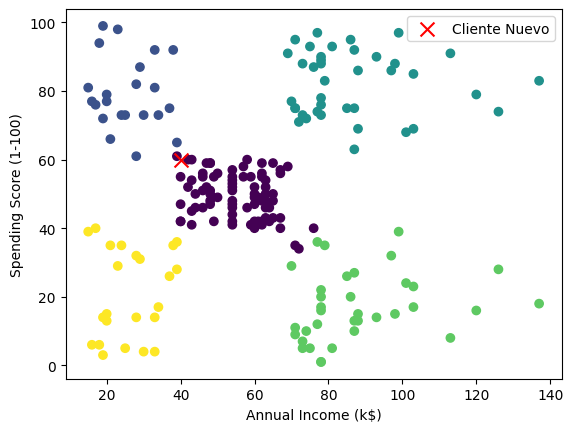

In [ ]:
# Visualizamos los datos del cliente nuevo en el espacio de las variables 'Annual Income (k$)' y 'Spending Score (1-100)'
plt.scatter(income_spending['Annual Income (k$)'], income_spending['Spending Score (1-100)'], c=income_spending['Cluster'], cmap='viridis')
plt.scatter(cliente_nuevo[0], cliente_nuevo[1], c='red', marker='x', s=100, label='Cliente Nuevo')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### **Conclusiones:**

A través de este análisis, hemos logrado segmentar nuestros clientes en cinco grupos distintos utilizando las variables `Spending Score` y `Annual Income`. Esta segmentación nos permite entender mejor las necesidades y comportamientos de nuestros clientes, y nos proporciona la capacidad de personalizar nuestras ofertas y comunicaciones de marketing para cada segmento.

Hemos identificado oportunidades para aumentar las ventas, particularmente en el segmento de clientes con ingresos altos pero puntuaciones de gasto bajas. Este grupo podría ser un objetivo ideal para campañas de marketing dirigidas.

Además, los diferentes segmentos de clientes pueden requerir diferentes estrategias de precios. Podríamos considerar la posibilidad de ofrecer productos o servicios premium a un precio más alto para el segmento de clientes con ingresos altos y puntuaciones de gasto altas.

En resumen, el análisis de clusters ha proporcionado insights valiosos que pueden informar nuestras estrategias de marketing, ventas, desarrollo de productos y precios. Sin embargo, estos resultados son solo el primer paso. Será importante validar estos segmentos y nuestras conclusiones con más investigación y pruebas.

## **5.2 Using the OpenAI API**

![image.png](attachment:image.png)

Bienvenido a este tutorial básico para usar la API de OpenAI en un Jupyter Notebook. Este tutorial cubrirá cómo generar texto utilizando el modelo GPT-3 de OpenAI.

Primero, necesitarás instalar la biblioteca `openai` de Python. Puedes hacerlo ejecutando el siguiente comando en una celda de tu Jupyter Notebook:

In [ ]:
!pip install --upgrade openai

python(4402) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Using cached anyio-4.4.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached httpx-0.27.0-py3-none-any.whl.metadata (7.2 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached httpcore-1.0.5-py3-none-any.whl.metadata (20 kB)
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.0/337.0 kB 1.6 MB/s eta 0:00:00a 0:00:01
Using cached anyio-4.4.0-py3-none-any.whl (86 kB)
Using cached distro-1.9.0-py3-none-any.whl (20 kB)
Using cached httpx-0.27.0-py3-none-any.whl (75 kB)
Using cached httpcore-1.0.5-py3-none-any.whl (77 kB)
Using cached sniffio-1.3.1-py3-none-any.whl (10 kB)
Using cached h11-0.14.0-py3-none-any.whl (58 kB)


In [ ]:
from openai import OpenAI

Antes de poder usar la API de OpenAI, necesitarás una clave de API. Puedes obtener una registrándote en el [sitio web de OpenAI](https://openai.com/signup/). Una vez que tengas tu clave de API, puedes configurarla de la siguiente manera:

In [ ]:
import os

# Reemplaza 'tu-clave-de-api' con tu clave de API real
os.environ['OPENAI_API_KEY'] = 'tu-clave-de-api'

**Nota:** Recuerda reemplazar `'tu-clave-de-api'` con tu clave de API real. Además, ten en cuenta que debes mantener tu clave de API segura y no compartirla con nadie.

Ahora que hemos configurado nuestra clave de API, podemos usar la API de OpenAI para generar texto. Aquí hay un ejemplo de cómo hacerlo:

## Generación de texto con OpenAI

In [ ]:
client = OpenAI()

completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a poetic assistant, skilled in explaining complex programming concepts with creative flair."},
    {"role": "user", "content": "Compose a poem that explains the concept of recursion in programming."}
  ]
)

print(completion.choices[0].message)

ChatCompletionMessage(content="In the realm of coding's intricate dance,\nThere lies a concept, a recursive trance.\nA function calling itself, in a loop so grand,\nCreating a loopback, across the land.\n\nLike a mirror reflecting endlessly,\nDividing tasks with splendid efficiency.\nEach iteration delves deeper still,\nUntil a base case brings the thrill.\n\nWith elegance and grace, it unravels,\nSolving problems, as it travels.\nLike a Russian doll, nested in delight,\nRecursion makes code shimmer bright.\n\nSo heed the call of recursive art,\nUnravel mysteries, heart to heart.\nIn the coding world's poetic stance,\nEmbrace the loop of recursive dance.", role='assistant', function_call=None, tool_calls=None)


Y eso es todo! Ahora deberías ser capaz de usar la API de OpenAI para generar texto en un Jupyter Notebook. Recuerda que puedes experimentar con diferentes valores para `prompt`, `temperature` y `max_tokens` para ver cómo afectan al texto generado.

## Generación de imágenes con OpenAI

In [ ]:
from openai import OpenAI
client = OpenAI()

response = client.images.generate(
  model="dall-e-3",
  prompt="a white siamese cat",
  size="1024x1024",
  quality="standard",
  n=1,
)

image_url = response.data[0].url

## Texto a voz con OpenAI

In [ ]:
from openai import OpenAI

client = OpenAI()

response = client.audio.speech.create(
    model="tts-1",
    voice="alloy",
    input="We are having a great time learning about OpenAI's APIs and how to use them in our projects.",
)

response.stream_to_file("output.mp3")

/var/folders/8j/f0xtldm91_1c2bpdr69fxgzw0000gn/T/ipykernel_30878/3991724827.py:11: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  response.stream_to_file("output.mp3")


## Voz a texto con OpenAI

In [ ]:
from openai import OpenAI
client = OpenAI()

audio_file= open("/Users/eugenio/Library/CloudStorage/OneDrive-Personal/UIDE/2024 Maestría Ciencia de Datos y Máquinas de Aprendizaje mención IA/Contenidos/Notebooks_DataMining/Recursos Adicionales/output.mp3", "rb")
transcription = client.audio.transcriptions.create(
  model="whisper-1",
  file=audio_file
)
print(transcription.text)

We are having a great time learning about OpenAI's APIs and how to use them in our projects.


## Preguntando a un DataFrame de Pandas

In [ ]:
import pandas as pd

# Import the 'mall_customers.csv' file
df = pd.read_csv('/Users/eugenio/Library/CloudStorage/OneDrive-Personal/UIDE/EPIC_4/Day_3/mall_customers.csv')

# Display the first 5 records
df.head(5)

# Convertir la tabla a una representación de cadena (string)
df_string = df.to_string()

# Pregunta sobre la edad promedio de los clientes en la tabla
question = "¿Cómo diseñarías una campaña de marketing para que el segmento de clientes Alto Ingreso-Bajo Gasto incremente su puntaje de gasto?"

# Pasar la variable al API de OpenAI
client = OpenAI()
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a data analyst. Here is the data:\n" + df_string},
        {"role": "user", "content": question}
    ]
)

# Obtener la respuesta del API
answer = response.choices[0].message.content
print(answer)

Para diseñar una campaña de marketing que impulse el puntaje de gasto del segmento de clientes de Alto Ingreso-Bajo Gasto, es importante considerar estrategias específicas que se enfoquen en mejorar la experiencia de compra y motivar a estos clientes a gastar más. Aquí hay algunas recomendaciones para diseñar esta campaña:

1. **Identificar las necesidades y preferencias de los clientes**: Realiza encuestas o estudios de mercado para comprender mejor qué factores influyen en que estos clientes tengan un bajo puntaje de gasto a pesar de tener un alto ingreso. ¿Qué los motiva a gastar menos? ¿Qué aspectos de la experiencia de compra podrían mejorarse para fomentar un mayor gasto?

2. **Estrategias de personalización**: Utiliza la información recopilada para personalizar las ofertas y promociones que se les presentan a estos clientes. Por ejemplo, podrías enviarles cupones de descuento en base a sus preferencias de compra o historial de compras.

3. **Programa de lealtad exclusivo para es

Eso es todo, ahora puedes probar OpenAI en tu propio código. ¡Buena suerte!

## **5.2 Using Meta LLama 3**

![image.png](attachment:image.png)

To download the model weights and tokenizer, please visit the [Meta Llama website](https://llama.meta.com/llama-downloads/) and accept their License.

Once your request is approved, you will receive a signed URL over email. Then, run the `download.sh` script, passing the URL provided when prompted to start the download.

**Pre-requisites:** Ensure you have `wget` and `md5sum` installed. Then run the script: `./download.sh`.

Remember that the links expire after 24 hours and a certain amount of downloads. You can always re-request a link if you start seeing errors such as `403: Forbidden`.

![image.png](attachment:image.png)